In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
y_test


(60000, 28, 28)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [ ]:
model = keras.Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    keras.layers.Dense(20,input_shape = (784,),activation="sigmoid"),
    keras.layers.Dense(15,activation="sigmoid"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten,y_train,epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5320 - loss: 1.5962
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8977 - loss: 0.4292
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9205 - loss: 0.2875
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9311 - loss: 0.2396
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9384 - loss: 0.2147
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9486 - loss: 0.1847
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9508 - loss: 0.1706
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9550 - loss: 0.1557
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9580 - loss: 0.1475
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9596 - loss: 0.1392
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9613 - loss: 0.1379
Epoch 12/20
1875/1875 ━━━━━━━━

In [ ]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9483 - loss: 0.1740


[0.15642079710960388, 0.9555000066757202]

In [ ]:
y_predict = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


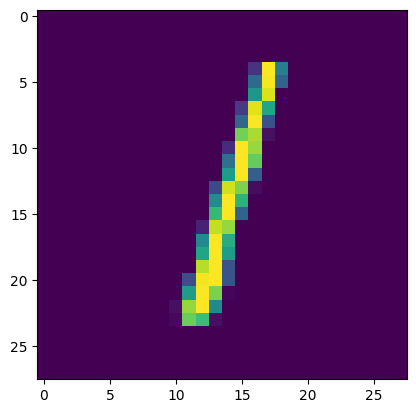

In [ ]:
plt.imshow(x_test[2])

In [ ]:
print(np.argmax(y_predict[2]))


1


np.uint8(1)

In [ ]:
from sklearn import metrics

cf = metrics.confusion_matrix(y_test,np.argmax(y_predict,axis=1))
cf

array([[ 962,    0,    4,    0,    0,    6,    3,    3,    1,    1],
       [   0, 1113,    5,    4,    0,    0,    6,    2,    5,    0],
       [  11,    2,  981,    7,   11,    0,    7,    5,    8,    0],
       [   1,    1,   19,  949,    1,   14,    2,   11,    9,    3],
       [   0,    0,    4,    0,  942,    2,    9,    4,    3,   18],
       [   7,    0,    1,   15,    2,  831,   10,    2,   20,    4],
       [  13,    3,    3,    1,    4,   11,  921,    0,    2,    0],
       [   1,    9,   25,    6,    8,    0,    0,  961,    3,   15],
       [   3,    3,   12,   10,    9,    8,    5,    4,  915,    5],
       [   5,    4,    0,    8,   19,    9,    0,    6,    9,  949]])

<Axes: >

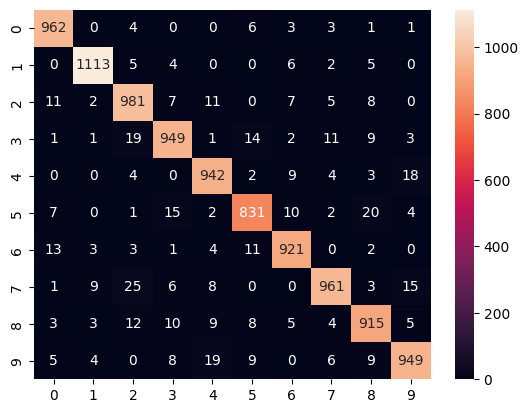

In [ ]:
import seaborn as sns

sns.heatmap(cf,annot=True,fmt="d")